<a href="https://colab.research.google.com/github/Ishan0704/DSBDA-Practicals/blob/main/Ass5_modified.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/content/Titanic2.csv')
df

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survived
0,1,22.0,7.2500,0,1,0,3,2.0,0
1,2,38.0,71.2833,1,1,0,1,0.0,1
2,3,26.0,7.9250,1,0,0,3,2.0,1
3,4,35.0,53.1000,1,1,0,1,2.0,1
4,5,35.0,8.0500,0,0,0,3,2.0,0
...,...,...,...,...,...,...,...,...,...
1304,1305,28.0,8.0500,0,0,0,3,2.0,0
1305,1306,39.0,108.9000,1,0,0,1,0.0,0
1306,1307,38.5,7.2500,0,0,0,3,2.0,0
1307,1308,28.0,8.0500,0,0,0,3,2.0,0


In [3]:
df.isnull().sum()

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
Parch          0
Pclass         0
Embarked       2
Survived       0
dtype: int64

In [5]:
df.dropna()

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survived
0,1,22.0,7.2500,0,1,0,3,2.0,0
1,2,38.0,71.2833,1,1,0,1,0.0,1
2,3,26.0,7.9250,1,0,0,3,2.0,1
3,4,35.0,53.1000,1,1,0,1,2.0,1
4,5,35.0,8.0500,0,0,0,3,2.0,0
...,...,...,...,...,...,...,...,...,...
1304,1305,28.0,8.0500,0,0,0,3,2.0,0
1305,1306,39.0,108.9000,1,0,0,1,0.0,0
1306,1307,38.5,7.2500,0,0,0,3,2.0,0
1307,1308,28.0,8.0500,0,0,0,3,2.0,0


<Axes: ylabel='Frequency'>

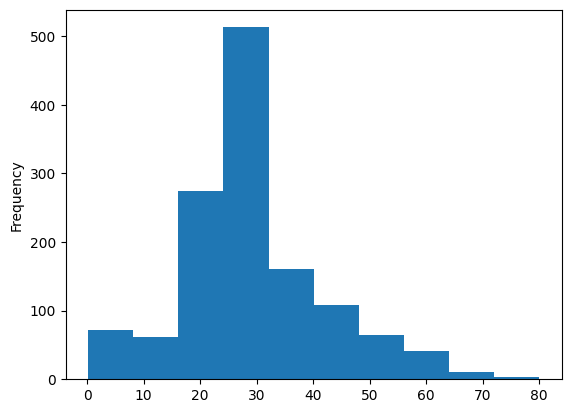

In [7]:
df['Age'].plot(kind='hist')

<Axes: ylabel='Frequency'>

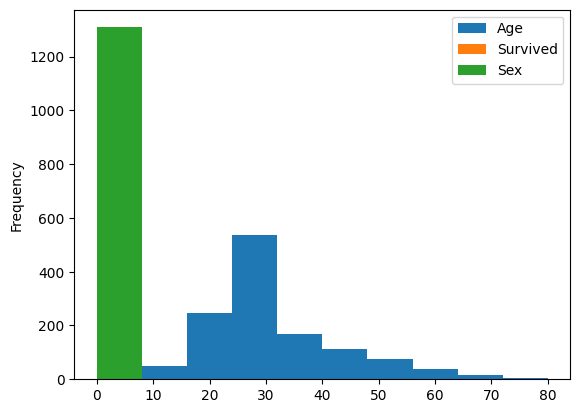

In [9]:
df[['Age','Survived','Sex']].plot(kind='hist')

<Axes: >

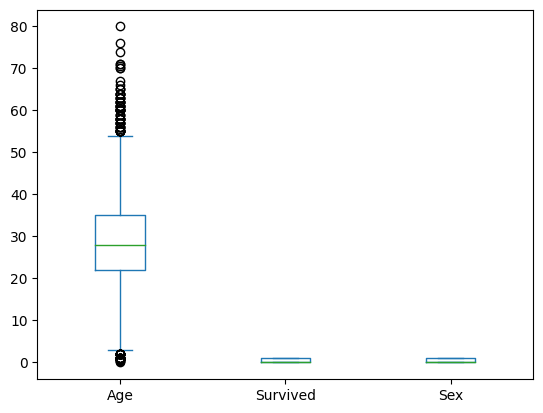

In [10]:
df[['Age','Survived','Sex']].plot(kind='box')

In [16]:
male_survived=df.query('Survived==1 and Sex==1')
print(len(male_survived))
female_survived=df.query('Survived==1 and Sex==0')
print(len(female_survived))


233
109


<Axes: ylabel='Frequency'>

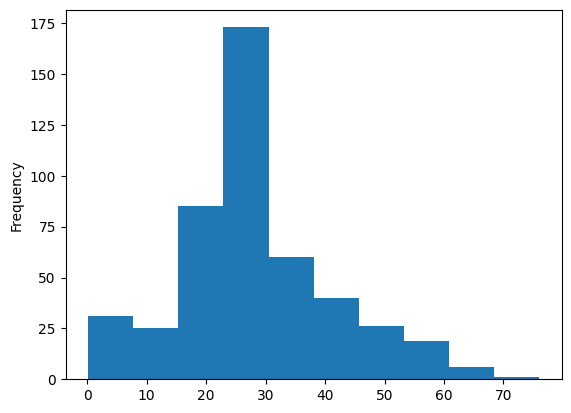

In [17]:
df1=df.query('Sex==1')
df1['Age'].plot(kind='hist')

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

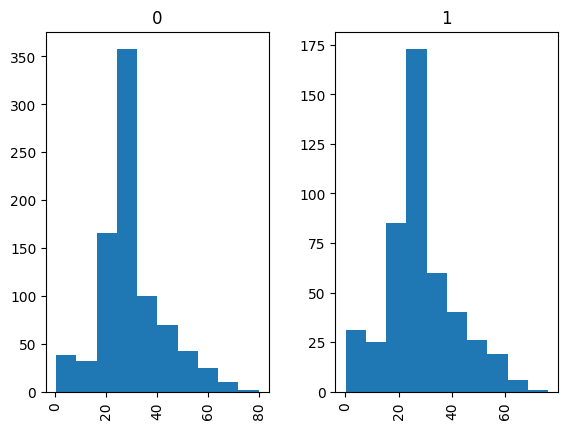

In [19]:
df.hist(column=['Age'] ,by ='Sex')

array([[<Axes: title={'center': '(0, 0)'}>,
        <Axes: title={'center': '(0, 1)'}>],
       [<Axes: title={'center': '(1, 0)'}>,
        <Axes: title={'center': '(1, 1)'}>]], dtype=object)

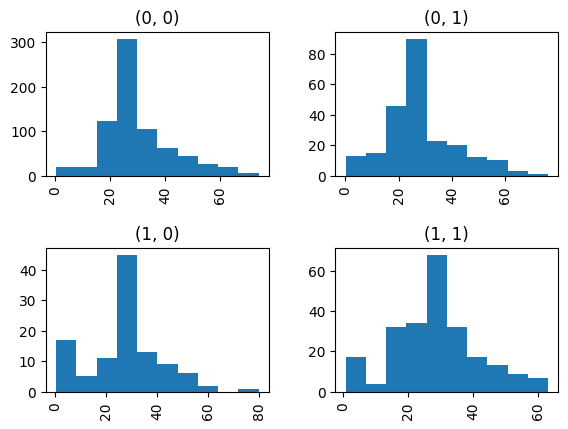

In [20]:
df.hist(column=['Age'],by=['Survived','Sex'])

In [23]:
df['Sex'].replace([0,1],['male','female'],inplace=True)
df['Survived'].replace([0,1],['died','survived'], inplace=True)
df

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survived
0,1,22.0,7.2500,male,1,0,3,2.0,died
1,2,38.0,71.2833,female,1,0,1,0.0,survived
2,3,26.0,7.9250,female,0,0,3,2.0,survived
3,4,35.0,53.1000,female,1,0,1,2.0,survived
4,5,35.0,8.0500,male,0,0,3,2.0,died
...,...,...,...,...,...,...,...,...,...
1304,1305,28.0,8.0500,male,0,0,3,2.0,died
1305,1306,39.0,108.9000,female,0,0,1,0.0,died
1306,1307,38.5,7.2500,male,0,0,3,2.0,died
1307,1308,28.0,8.0500,male,0,0,3,2.0,died


<Axes: title={'center': 'Age'}, xlabel='[Survived, Sex]'>

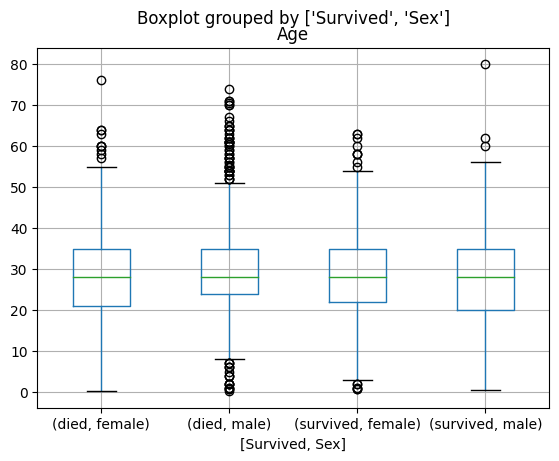

In [24]:
df.boxplot(column=['Age'],by=['Survived','Sex'])

In [34]:
df1=df.query('Survived=="died" and Sex=="male"')
Q1=df1['Age'].quantile(0.25)
Q3=df1['Age'].quantile(0.75)
IQR=Q3-Q1
lower=Q1-(1.5*IQR)
upper=Q3+(1.5*IQR)
outliers=df1.query('Age<@lower or Age>@upper')
print(outliers)
print(len(outliers))

      Passengerid   Age      Fare   Sex  sibsp  Parch  Pclass  Embarked  \
6               7  54.0   51.8625  male      0      0       1       2.0   
7               8   2.0   21.0750  male      3      1       3       2.0   
16             17   2.0   29.1250  male      4      1       3       1.0   
33             34  66.0   10.5000  male      0      0       2       2.0   
50             51   7.0   39.6875  male      4      1       3       2.0   
...           ...   ...       ...   ...    ...    ...     ...       ...   
1207         1208  57.0  146.5208  male      1      0       1       0.0   
1269         1270  55.0   50.0000  male      0      0       1       2.0   
1270         1271   5.0   31.3875  male      4      2       3       2.0   
1278         1279  57.0   13.0000  male      0      0       2       2.0   
1280         1281   6.0   21.0750  male      3      1       3       2.0   

     Survived  
6        died  
7        died  
16       died  
33       died  
50       died  
...

In [35]:
df1=df.query('Survived=="survived" and Sex=="male"')
Q1=df1['Age'].quantile(0.25)
Q3=df1['Age'].quantile(0.75)
IQR=Q3-Q1
lower=Q1-(1.5*IQR)
upper=Q3+(1.5*IQR)
outliers=df1.query('Age<@lower or Age>@upper')
print(outliers)
print(len(outliers))

     Passengerid   Age  Fare   Sex  sibsp  Parch  Pclass  Embarked  Survived
570          571  62.0  10.5  male      0      0       2       2.0  survived
587          588  60.0  79.2  male      1      1       1       0.0  survived
630          631  80.0  30.0  male      0      0       1       2.0  survived
3
